In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [5]:
x = 250
y = 10
x+y

260

In [6]:
x = np.uint8([250])

In [7]:
print(x)

[250]


In [8]:
y = np.uint8([10])

In [9]:
print(y)

[10]


In [10]:
x+y

array([4], dtype=uint8)

In [11]:
cv2.add(x,y)

array([[255]], dtype=uint8)

In [19]:
img1 = cv2.imread('img1.png')
img2 = cv2.imread('opencv.png')

In [20]:
w = 0.5
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
def nothing(x):
    pass

In [22]:
cv2.namedWindow('image')
cv2.createTrackbar('weight','image',0,255,nothing)
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    weight = cv2.getTrackbarPos('weight', 'image')
    dst = cv2.addWeighted(img1,weight/255,img2,1-weight/255,0)
    cv2.imshow('image',dst)
cv2.destroyAllWindows()

[ WARN:0] global /private/var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/pip-req-build-tetsazc6/opencv/modules/highgui/src/window.cpp (704) createTrackbar UI/Trackbar(weight@image): Using 'value' pointer is unsafe and deprecated. Use NULL as value pointer. To fetch trackbar value setup callback.


In [9]:
img1 = cv2.imread('image4.jpeg')
img2 = cv2.imread('opencv2.png')

In [10]:
def pltImage(img):
    channels = len(img.shape)
    if channels == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap='gray')
    plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
    plt.show()

In [11]:
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
print(rows,cols,channels)

580 822 3


In [12]:
roi = img1[0:rows, 0:cols ]

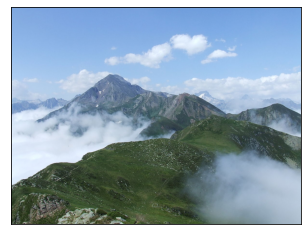

In [14]:
pltImage(img1)

In [15]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

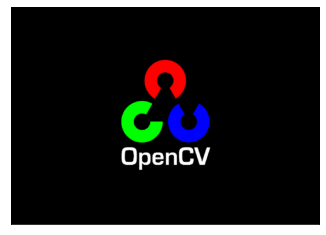

In [16]:
pltImage(img2)

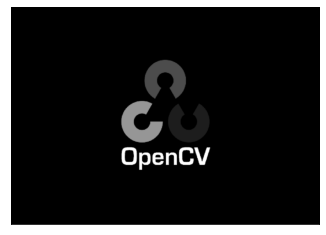

In [17]:
pltImage(img2gray)

In [18]:
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)

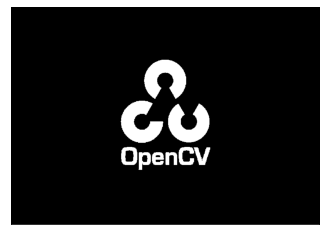

In [19]:
pltImage(mask)

In [20]:
mask_inv = cv2.bitwise_not(mask)

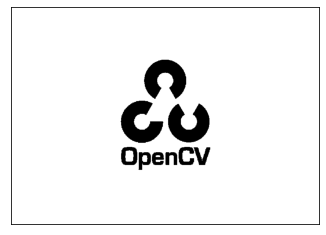

In [21]:
pltImage(mask_inv)

In [22]:
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

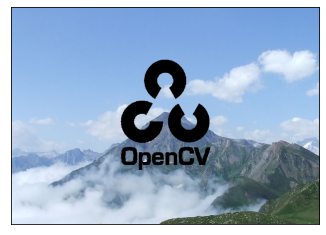

In [23]:
pltImage(img1_bg)

In [24]:
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

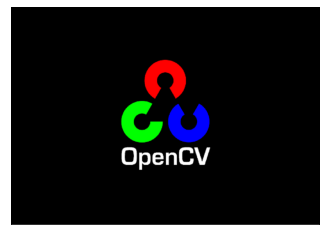

In [25]:
pltImage(img2_fg)

In [26]:
dst = cv2.add(img1_bg,img2_fg)

In [27]:
img1[0:rows, 0:cols ] = dst

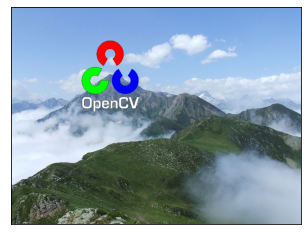

In [28]:
pltImage(img1)

In [29]:
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()